In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### dataset loading

In [34]:
data=pd.read_csv("C:\\Users\\mtkan\\Downloads\\spam.csv",encoding=("ISO-8859-1"))

In [35]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(columns, axis = 1, inplace = True)
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [38]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [39]:
data.shape

(5572, 2)

In [40]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [41]:
data.duplicated().sum()

403

In [42]:
data.drop_duplicates(keep= 'first', inplace = True)
data.duplicated().sum()

0

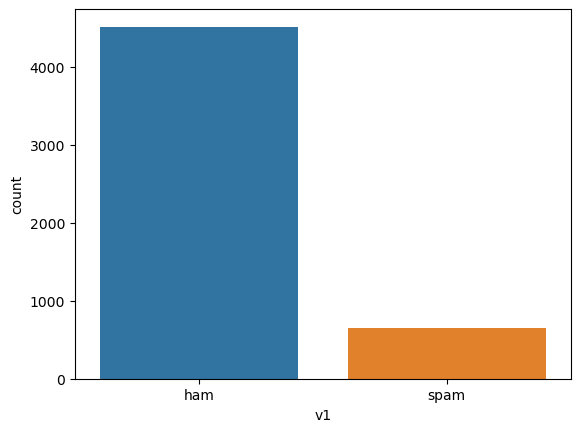

In [43]:
sns.countplot(x='v1', data=data)
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['v1']=le.fit_transform(data['v1'])
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'],data['v1'], test_size = 0.33,random_state=3)

In [46]:
data.groupby('v1').describe()

v2                                                               
   count unique                                                top freq
v1                                                                     
0   4516   4516  Go until jurong point, crazy.. Available only ...    1
1    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [47]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english',lowercase=True)
X_train_f = feature_extraction.fit_transform(X_train)
X_test_f = feature_extraction.transform(X_test)
type(feature_extraction)


sklearn.feature_extraction.text.TfidfVectorizer

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_f, y_train)
y_predicted = model.predict(X_test_f)

In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy of this Model is ",accuracy_score(y_predicted,y_test)*100,'%')

Accuracy of this Model is  95.07620164126612 %


In [55]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
model1 = MultinomialNB()
model1.fit(X_train_f, y_train)

MultinomialNB()

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import cm
confusion_matrix(y_test, y_predicted)


array([[1472,    3],
       [  81,  150]], dtype=int64)

In [57]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, X_test_f, y_test,cv = 5)
from sklearn.model_selection import cross_val_score
cv_s = cross_val_score(model1, X_train_f, y_train,cv = 5)
cv_scores

array([0.93567251, 0.93255132, 0.92668622, 0.93548387, 0.92668622])

#### Accuracy of a model

In [58]:
print("Accuracy of training models :",cv_s.mean()*100)
print("Accuracy of testing models :",cv_scores.mean()*100)

Accuracy of training models : 95.72617170883066
Accuracy of testing models : 93.1416027850663


###    [1] indicates a spam Mail and [0] indicates a normal Mail 

In [59]:
mail = ['PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires,,,']

In [60]:
extract = feature_extraction.transform(mail)
print(model.predict(extract))

[1]


In [64]:
extract = feature_extraction.transform(mail)
print(model1.predict(extract))

[1]


In [61]:
mail1 = ['Tell where you reached,,,']

In [62]:
extract = feature_extraction.transform(mail1)
print(model.predict(extract))

[0]


In [65]:
extract = feature_extraction.transform(mail1)
print(model1.predict(extract))

[0]
